# Retail Sales Forecast - Part 4 of 5

## Seasonal ARIMA

### Notebook Setup

In [1]:
%matplotlib inline

from __future__ import division
from __future__ import print_function

# ignore deprecation warnings in sklearn
import warnings
warnings.filterwarnings("ignore")

# Import Pandas, Matplotlib, etc
from math import sqrt

import pandas as pd
import matplotlib.pyplot as plt

from pyramid.arima import auto_arima

plt.style.use('ggplot')

### Load & Transform for SARIMA

Auto SARIMA just needs a data column and the value we're trying to forecast

In [2]:
df = pd.read_excel('../data/daily-sales.xlsx', index_col='date', parse_dates=True)
df.drop(['year', 'day', 'week', 'avg_sale', 'month', 'customers', 'is_open', 'is_holiday'], axis='columns', inplace=True)
df.columns = ['y']
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 352 entries, 2017-11-17 to 2018-11-03
Data columns (total 1 columns):
y    352 non-null float64
dtypes: float64(1)
memory usage: 5.5 KB


In [3]:
df.head(10)

,y
date,
2017-11-17,348.63
2017-11-18,1334.38
2017-11-19,0.00
2017-11-20,512.08
2017-11-21,0.00
2017-11-22,1132.31
2017-11-23,0.00
2017-11-24,2529.53
2017-11-25,1545.76


In [4]:
df['y'].describe()

count     352.000000
mean      711.925966
std       631.413817
min         0.000000
25%       237.855000
50%       559.600000
75%      1062.192500
max      3493.050000
Name: y, dtype: float64

### Auto Fit SARIMA

Be aware that this will take a while... You'll see a "Total fit time" message when complete.

In [5]:
model = auto_arima(
    df, 
    start_p=1, start_q=1,
    max_p=7, max_q=7, 
    m=12,
    start_P=1, 
    seasonal=True,
    d=1, D=1, 
    trace=True,
    error_action='ignore',  
    suppress_warnings=True, 
    stepwise=True)

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=5383.550, BIC=5406.506, Fit time=2.716 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=5814.512, BIC=5822.164, Fit time=0.033 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=5617.566, BIC=5632.870, Fit time=1.044 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=5380.185, BIC=5395.489, Fit time=1.792 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=5382.103, BIC=5401.233, Fit time=2.429 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 0, 12); AIC=5570.382, BIC=5581.860, Fit time=0.208 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 2, 12); AIC=5382.094, BIC=5401.224, Fit time=4.712 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=5371.789, BIC=5394.745, Fit time=8.006 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 2, 12); AIC=5379.619, BIC=5406.401, Fit time=7.442 seconds
Fit ARIMA: order=(0, 1, 0) s

### Instantiate the Model

In [6]:
df_train = df[:-60]
df_test = df[-60:]

model.fit(df_train)

ARIMA(callback=None, disp=0, maxiter=50, method=None, order=(0, 1, 1),
   out_of_sample_size=0, scoring='mse', scoring_args={},
   seasonal_order=(1, 1, 2, 12), solver='lbfgs', start_params=None,
   suppress_warnings=True, transparams=True, trend='c')

In [7]:
yhat = model.predict(60)
df_test['yhat'] = yhat
df_test.head(10)

,y,yhat
date,,
2018-09-05,1065.45,633.654891
2018-09-06,1057.91,800.003514
2018-09-07,1448.85,710.332380
2018-09-08,1452.40,916.195002
2018-09-09,0.00,841.577623
2018-09-10,805.97,764.348214
2018-09-11,688.63,959.895465
2018-09-12,912.07,766.093788
2018-09-13,553.08,653.418804


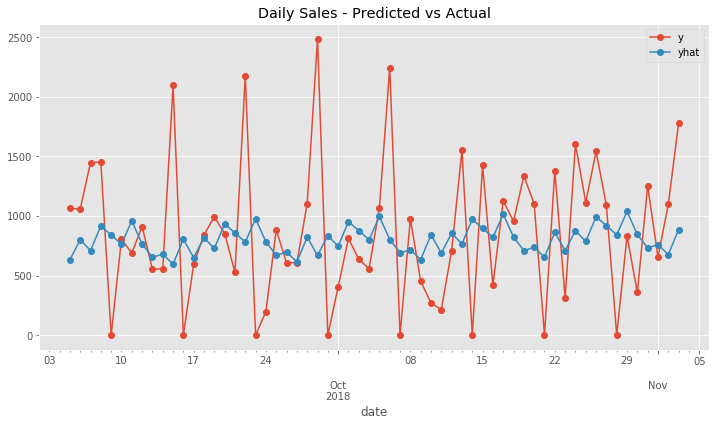

In [8]:
df_test.plot(figsize=(12, 6), marker='o')
plt.title('Daily Sales - Predicted vs Actual')
plt.show()